# Exercise 4.10 Coding Etiquette and Excel Reporting

## This script contains the following:
1. Import Libraries and Data Files
2. Addressing PII
3. Deriving New Variables, Deriving Contingency Tables, Aggregating Variables
4. Create Visualizations of Customer Profiles
5. Create and Export Other Suitable Visualizations

# 1. Import Libraries and Data Files

#### Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a string of the path for the main project folder
path = r'C:\Users\Ryan\Documents\07-17-2023 Instacart Basket Analysis'

In [3]:
# Import the “orders_products_merged.pkl” data set using the os library
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Check the output
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spender_label,median_days_since_prior_order,customer_frequency_level,first_name,last_name,state,age,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423


In [5]:
# Check the dimensions
ords_prods_all.shape

(32404859, 29)

# 2. Addressing PII

#### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [6]:
# Option to show all columns in dataframe
pd.options.display.max_columns=None

In [7]:
# Check the output
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_label,mean_spent,spender_label,median_days_since_prior_order,customer_frequency_level,first_name,last_name,state,age,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423


The only personally identifiable information is the first name and last name of instacart customers. The names of customers are not needed for analysis. Though the names were fabricated for the purposes of learning, we will treat them as sensitive information. Therefore, the first and last names will be removed from the dataframe.

In [8]:
# Drop 'first_name' and 'last_name' column from ords_prods_merge
ords_prods_all = ords_prods_all.drop(columns = ['first_name', 'last_name'])

In [9]:
# Check the dimensions
ords_prods_all.shape

(32404859, 27)

# 3. Deriving New Variables, Deriving Contingency Tables, Aggregating Variables

#### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
1. Divide the states into the following regions: Northeast, Midwest, South, West.
2. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

#### Divide the states into the following regions: Northeast, Midwest, South, West

In [10]:
# Create 'region' column that assigns 'Northeast' label
ords_prods_all.loc[ords_prods_all['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [11]:
# Create 'region' column that assigns 'Midwest' label
ords_prods_all.loc[ords_prods_all['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [12]:
# Create 'region' column that assigns 'South' label
ords_prods_all.loc[ords_prods_all['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [13]:
# Create 'region' column that assigns 'West' label
ords_prods_all.loc[ords_prods_all['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [14]:
# Check the frequencies of 'region' column
ords_prods_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [15]:
# Check the dimensions
ords_prods_all.shape

(32404859, 28)

#### Determine whether there’s a difference in spending habits between the different U.S. regions.

In [16]:
# Create a crosstab between 'region' and 'spender_label'
crosstab = pd.crosstab(ords_prods_all['region'], ords_prods_all['spender_label'], dropna=False)

In [17]:
# Check the output
crosstab

spender_label,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


#### A chi-square test can be conducted to determine if spending habits are different for customers living in different U.S. regions. 
The p-value for this chi-square test is 0, so the result is statistically significant. We conclude that spending habits differ across regions in the United States.

#### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [18]:
# Check the dimensions of ords_prods_all dataframe where max_order < 5
ords_prods_all.loc[ords_prods_all['max_order'] < 5].shape

(1440295, 28)

In [19]:
# Exclude customers with max_order < 5 from ords_prods_all
ords_prods_all = ords_prods_all.loc[ords_prods_all['max_order'] >= 5]

In [20]:
# Check the dimensions
ords_prods_all.shape

(30964564, 28)

#### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [21]:
# Import the “customers.csv” data set using the os library
df_custs = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [22]:
# Check the output
df_custs.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [23]:
# Obtain age statistics
df_custs['Age'].describe()

count    206209.000000
mean         49.501646
std          18.480962
min          18.000000
25%          33.000000
50%          49.000000
75%          66.000000
max          81.000000
Name: Age, dtype: float64

In [24]:
# Obtain income statistics
df_custs['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

In [25]:
# Obtain number_of_dependants statistics
df_custs['n_dependants'].describe()

count    206209.000000
mean          1.499823
std           1.118433
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           3.000000
Name: n_dependants, dtype: float64

The median age is 49. This value will be used to divide the customers into two age groups:
- Young (49 or younger)
- Old (older than 49)

The 25th percentile of income is 59,874, and the 75th percentile of income is 124,244. These two values will be used to divide the customers into three income levels:
- Low income (below 59,874)
- Mid income (59,874 to 124,244)
- High income (above 124,244)

Customers have 0, 1, 2, or 3 dependants. These values will be used to divide the customers into two groups:
- Adult (Has 0 dependants)
- Parent (Has at least 1 dependant)

#### The profile flag will be created as follows:

- Young, low income adult
- Young, low income parent
- Young, mid income adult
- Young, mid income adult parent
- Young, high income adult
- Young, high income parent
- Old, low income adult
- Old, low income parent
- Old, mid income adult
- Old, mid income adult parent
- Old, high income adult
- Old, high income parent

In [26]:
# Create 'profile' column that assigns 'Young, low income adult' label
ords_prods_all.loc[(ords_prods_all['age'] <= 49) & (ords_prods_all['income'] < 59874) & (ords_prods_all['number_of_dependants'] == 0), 'profile'] = 'Young, low income adult'

In [27]:
# Create 'profile' column that assigns 'Young, low income parent' label
ords_prods_all.loc[(ords_prods_all['age'] <= 49) & (ords_prods_all['income'] < 59874) & (ords_prods_all['number_of_dependants'].isin([1, 2, 3])), 'profile'] = 'Young, low income parent'

In [28]:
# Create 'profile' column that assigns 'Young, mid income adult' label
ords_prods_all.loc[(ords_prods_all['age'] <= 49) & (ords_prods_all['income'] >= 59874) & (ords_prods_all['income'] <= 124244) & (ords_prods_all['number_of_dependants'] == 0), 'profile'] = 'Young, mid income adult'

In [29]:
# Create 'profile' column that assigns 'Young, mid income parent' label
ords_prods_all.loc[(ords_prods_all['age'] <= 49) & (ords_prods_all['income'] >= 59874) & (ords_prods_all['income'] <= 124244) & (ords_prods_all['number_of_dependants'].isin([1, 2, 3])), 'profile'] = 'Young, mid income parent'

In [30]:
# Create 'profile' column that assigns 'Young, high income adult' label
ords_prods_all.loc[(ords_prods_all['age'] <= 49) & (ords_prods_all['income'] > 124244) & (ords_prods_all['number_of_dependants'] == 0), 'profile'] = 'Young, high income adult'

In [31]:
# Create 'profile' column that assigns 'Young, high income parent' label
ords_prods_all.loc[(ords_prods_all['age'] <= 49) & (ords_prods_all['income'] > 124244) & (ords_prods_all['number_of_dependants'].isin([1, 2, 3])), 'profile'] = 'Young, high income parent'

In [32]:
# Create 'profile' column that assigns 'Old, low income adult' label
ords_prods_all.loc[(ords_prods_all['age'] > 49) & (ords_prods_all['income'] < 59874) & (ords_prods_all['number_of_dependants'] == 0), 'profile'] = 'Old, low income adult'

In [33]:
# Create 'profile' column that assigns 'Old, low income parent' label
ords_prods_all.loc[(ords_prods_all['age'] > 49) & (ords_prods_all['income'] < 59874) & (ords_prods_all['number_of_dependants'].isin([1, 2, 3])), 'profile'] = 'Old, low income parent'

In [34]:
# Create 'profile' column that assigns 'Old, mid income adult' label
ords_prods_all.loc[(ords_prods_all['age'] > 49) & (ords_prods_all['income'] >= 59874) & (ords_prods_all['income'] <= 124244) & (ords_prods_all['number_of_dependants'] == 0), 'profile'] = 'Old, mid income adult'

In [35]:
# Create 'profile' columnm that assigns 'Old, mid income parent' label
ords_prods_all.loc[(ords_prods_all['age'] > 49) & (ords_prods_all['income'] >= 59874) & (ords_prods_all['income'] <= 124244) & (ords_prods_all['number_of_dependants'].isin([1, 2, 3])), 'profile'] = 'Old, mid income parent'

In [36]:
# Create 'profile' column that assigns 'Old, high income adult' label
ords_prods_all.loc[(ords_prods_all['age'] > 49) & (ords_prods_all['income'] > 124244) & (ords_prods_all['number_of_dependants'] == 0), 'profile'] = 'Old, high income adult'

In [37]:
# Create 'profile' column that assigns 'Old, high income parent' label
ords_prods_all.loc[(ords_prods_all['age'] > 49) & (ords_prods_all['income'] > 124244) & (ords_prods_all['number_of_dependants'].isin([1, 2, 3])), 'profile'] = 'Old, high income parent'

In [38]:
# Obtain frequencies of 'profile' column
ords_prods_all['profile'].value_counts(dropna = False)

Young, mid income parent     7163135
Old, mid income parent       5449230
Old, high income parent      4793834
Young, low income parent     3024979
Young, mid income adult      2367644
Old, mid income adult        1803420
Old, high income adult       1633099
Young, high income parent    1485866
Old, low income parent       1307839
Young, low income adult      1011723
Young, high income adult      494942
Old, low income adult         428853
Name: profile, dtype: int64

In [39]:
# Check the output
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_label,mean_spent,spender_label,median_days_since_prior_order,customer_frequency_level,state,age,number_of_dependants,marital_status,income,region,profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,"Young, low income parent"
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,"Young, low income parent"
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,"Young, low income parent"
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,"Young, low income parent"
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,"Young, low income parent"


In [40]:
ords_prods_all.shape

(30964564, 29)

#### Create goods_type flag

In [41]:
# Import the “departments_wrangled.csv” data set using the os library
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [42]:
# check the output
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Based on the varying departments, goods will divided into five groups:
- Perishable foods (1, 3, 4, 12, 14, 16, 20) 
- Non-perishable foods (9, 13, 15, 19)
- Drinks (5, 7)
- Family care (8, 11, 17, 18)
- Miscellaneous (2, 6, 10, 21)

In [43]:
# Create 'goods_type' column that assigns 'Perishable foods' label
ords_prods_all.loc[ords_prods_all['department_id'].isin([1, 3, 4, 12, 14, 16, 20]), 'goods_type'] = 'Perishable foods'

In [44]:
# Create 'goods_type' column that assigns 'Non-perishable foods' label
ords_prods_all.loc[ords_prods_all['department_id'].isin([9, 13, 15, 19]), 'goods_type'] = 'Non-perishable foods'

In [45]:
# Create 'goods_type' column that assigns 'Drinks' label
ords_prods_all.loc[ords_prods_all['department_id'].isin([5, 7]), 'goods_type'] = 'Drinks'

In [46]:
# Create 'goods_type' column that assigns 'Home care' label
ords_prods_all.loc[ords_prods_all['department_id'].isin([8, 11, 17, 18]), 'goods_type'] = 'Home care'

In [47]:
# Create 'goods_type' column that assigns 'Miscellaneous' label
ords_prods_all.loc[ords_prods_all['department_id'].isin([2, 6, 10, 21]), 'goods_type'] = 'Miscellaneous'

In [48]:
# Obtain frequencies of 'goods_type' column
ords_prods_all['goods_type'].value_counts(dropna = False)

Perishable foods        19848479
Non-perishable foods     6383321
Drinks                   2716528
Home care                1627615
Miscellaneous             388621
Name: goods_type, dtype: int64

In [49]:
# Check the output
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_label,mean_spent,spender_label,median_days_since_prior_order,customer_frequency_level,state,age,number_of_dependants,marital_status,income,region,profile,goods_type
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,"Young, low income parent",Drinks
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,"Young, low income parent",Drinks
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,"Young, low income parent",Drinks
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,"Young, low income parent",Drinks
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Alabama,31,3,married,40423,South,"Young, low income parent",Drinks


In [50]:
# Check the dimensions
ords_prods_all.shape

(30964564, 30)

# 4. Create Visualizations of Customer Profiles

#### Create an appropriate visualization to show the distribution of profiles.

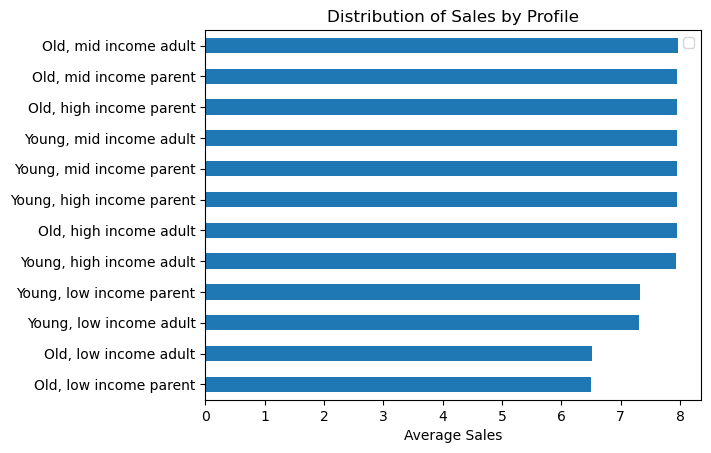

In [51]:
# Make a pivot table
piv1 = ords_prods_all.pivot_table(index='profile', values='prices', aggfunc='mean')

# Create a bar chart of the pivot table
bar_profile = piv1.sort_values(by='prices', ascending=True).plot.barh(title='Distribution of Sales by Profile', xlabel='Average Sales', ylabel='',)
bar_profile.legend('')

In [52]:
# Export bar_profile chart
bar_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile.png'), bbox_inches='tight')

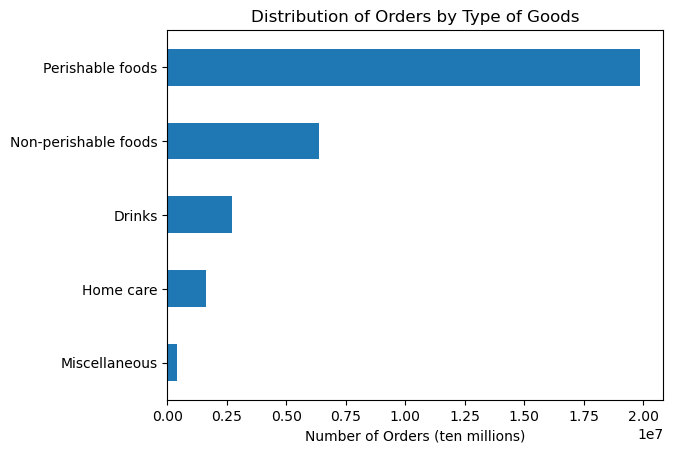

In [53]:
# Create a bar chart of the goods_type
bar_goods = ords_prods_all['goods_type'].value_counts(dropna = False, ascending=True).plot.barh(title = 'Distribution of Orders by Type of Goods', xlabel = 'Number of Orders (ten millions)')

In [54]:
# Export bar_goods chart
bar_goods.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_goods.png'), bbox_inches='tight')

#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [55]:
# Aggregate mean, min, and max of 'profile' for usage frequency and expenditure
ords_prods_all.groupby('profile').agg({k : ['min', 'max', 'mean'] for k in ['prices', 'days_since_prior_order']})

prices                 days_since_prior_order        \
                             min   max      mean                    min   max   
profile                                                                         
Old, high income adult       1.0  25.0  7.943386                    0.0  30.0   
Old, high income parent      1.0  25.0  7.956077                    0.0  30.0   
Old, low income adult        1.0  25.0  6.516348                    0.0  30.0   
Old, low income parent       1.0  25.0  6.503874                    0.0  30.0   
Old, mid income adult        1.0  25.0  7.962071                    0.0  30.0   
Old, mid income parent       1.0  25.0  7.956082                    0.0  30.0   
Young, high income adult     1.0  25.0  7.932772                    0.0  30.0   
Young, high income parent    1.0  25.0  7.948521                    0.0  30.0   
Young, low income adult      1.0  25.0  7.314102                    0.0  30.0   
Young, low income parent     1.0  25.0  7.331785                    0.0  30.0   
Young, mid income adult      1.0  25.0  7.955948                    0.0  30.0   
Young, mid income parent     1.0  25.0  7.951073                    0.0  30.0   

                                      
                                mean  
profile                               
Old, high income adult     10.615631  
Old, high income parent    10.796776  
Old, low income adult      11.042342  
Old, low income parent     11.140345  
Old, mid income adult      10.736644  
Old, mid income parent     10.818109  
Young, high income adult   10.724513  
Young, high income parent  10.789668  
Young, low income adult    11.129080  
Young, low income parent   10.995059  
Young, mid income adult    10.781116  
Young, mid income parent   10.699760

In [56]:
# Aggregate mean, min, and max of 'goods_type' for usage frequency and expenditure
ords_prods_all.groupby('goods_type').agg({k : ['min', 'max', 'mean'] for k in ['prices', 'days_since_prior_order']})

prices                 days_since_prior_order        \
                        min   max      mean                    min   max   
goods_type                                                                 
Drinks                  1.0  15.0  7.707480                    0.0  30.0   
Home care               1.0  15.0  7.634441                    0.0  30.0   
Miscellaneous           1.0  15.0  7.836474                    0.0  30.0   
Non-perishable foods    1.0  20.0  6.234268                    0.0  30.0   
Perishable foods        1.0  25.0  8.314517                    0.0  30.0   

                                 
                           mean  
goods_type                       
Drinks                10.728529  
Home care             11.068174  
Miscellaneous         10.651732  
Non-perishable foods  10.918018  
Perishable foods      10.768934

#### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

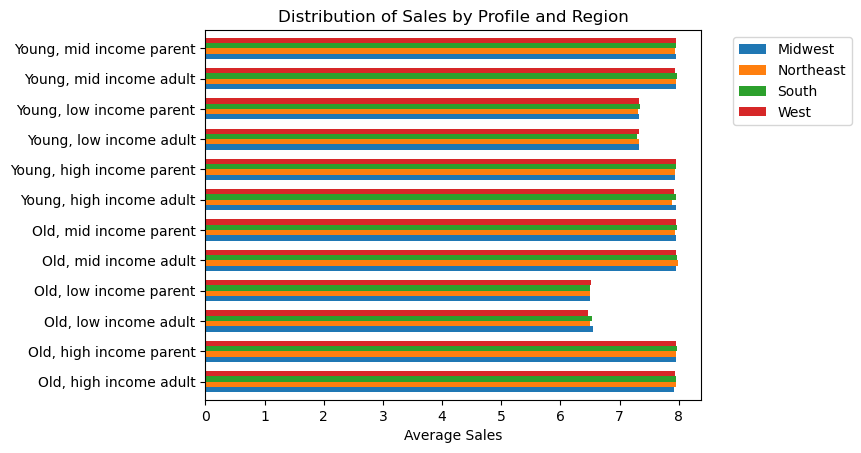

In [57]:
# Make a pivot table
piv2 = ords_prods_all.pivot_table(index='profile', columns='region', values='prices', aggfunc='mean')

# Create a bar of the pivot table
bar_profile_region = piv2.plot.barh(title='Distribution of Sales by Profile and Region', width=0.7, xlabel='Average Sales', ylabel='')
bar_profile_region.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [58]:
# Export bar_profile_goods chart
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_region.png'), bbox_inches='tight')

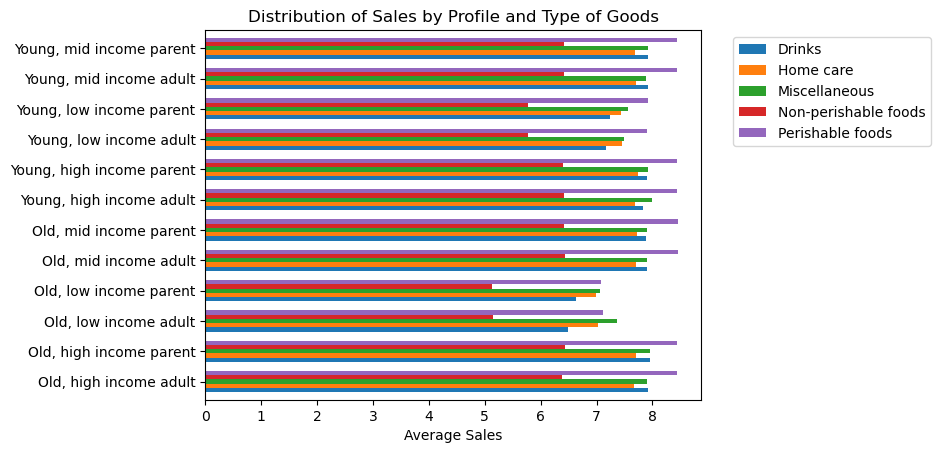

In [59]:
# Make a pivot table
piv3 = ords_prods_all.pivot_table(index='profile', columns='goods_type', values='prices', aggfunc='mean')

# Create a bar of the pivot table
bar_profile_goods = piv3.plot.barh(title='Distribution of Sales by Profile and Type of Goods', width=0.7, xlabel='Average Sales', ylabel='')
bar_profile_goods.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [60]:
# Export bar_profile_region chart
bar_profile_goods.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_goods.png'), bbox_inches='tight')

# 5. Create and Export Other Suitable Visualizations

#### Produce suitable charts to illustrate your results and export them in your project folder.

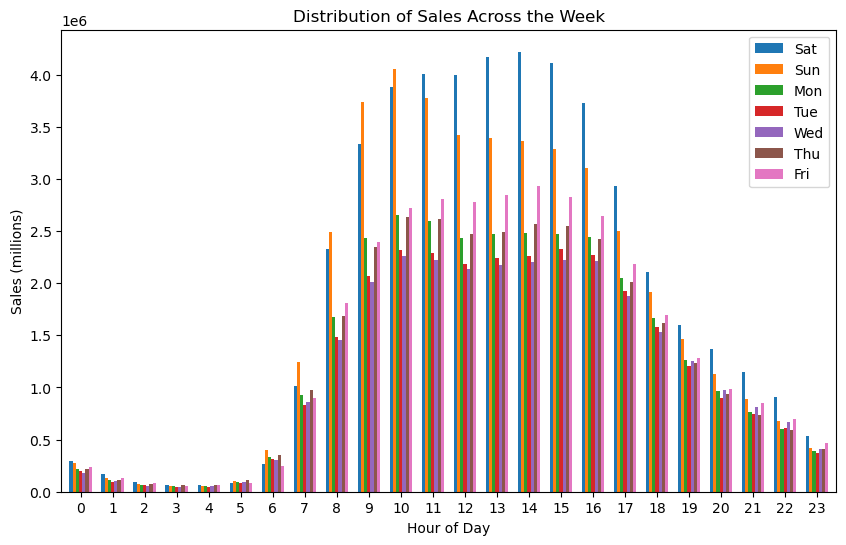

In [62]:
# Make a pivot table
piv4 = ords_prods_all.pivot_table(index='order_hour_of_day', columns='orders_day_of_week', values='prices', aggfunc='sum')

# Create a bar of the pivot table
bar_sales_week_hour = piv4.plot.bar(figsize=(10,6), width=0.7, title='Distribution of Sales Across the Week', xlabel='Hour of Day', ylabel='Sales (millions)', rot=0)
bar_sales_week_hour.legend(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

In [63]:
# Export bar_sales_week_hour chart
bar_sales_week_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_week_hour.png'), bbox_inches='tight')

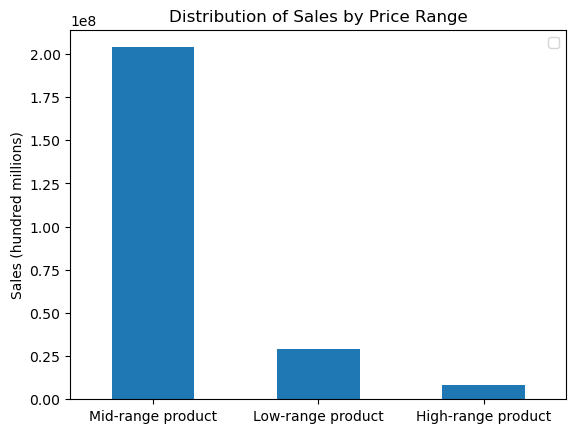

In [71]:
# Make a pivot table
piv5 = ords_prods_all.pivot_table(index='price_range', values='prices', aggfunc='sum')

# Create a bar chart of the pivot table
bar_sales_price_range = piv5.sort_values(by='prices', ascending=False).plot.bar(title='Distribution of Sales by Price Range', xlabel='', ylabel='Sales (hundred millions)', rot=0)
bar_sales_price_range.legend('')

In [72]:
# Export bar_sales_price_range chart
bar_sales_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_price_range.png'))

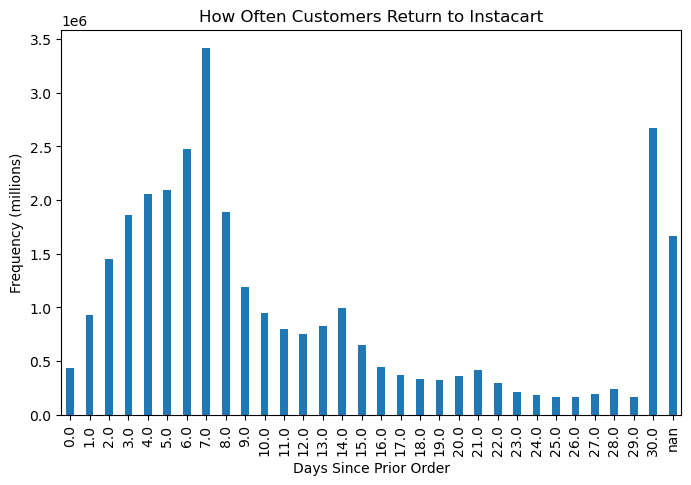

In [68]:
# Create a bar chart showing the distribution of days since prior order
bar_days_since_prior_order = ords_prods_all['days_since_prior_order'].value_counts(dropna = False).sort_index().plot.bar(figsize=(8,5), width=0.4, title = 'How Often Customers Return to Instacart', xlabel = 'Days Since Prior Order', ylabel = 'Frequency (millions)')

In [69]:
# Export bar_sales_price_range chart
bar_days_since_prior_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_days_since_prior_order.png'), bbox_inches='tight')

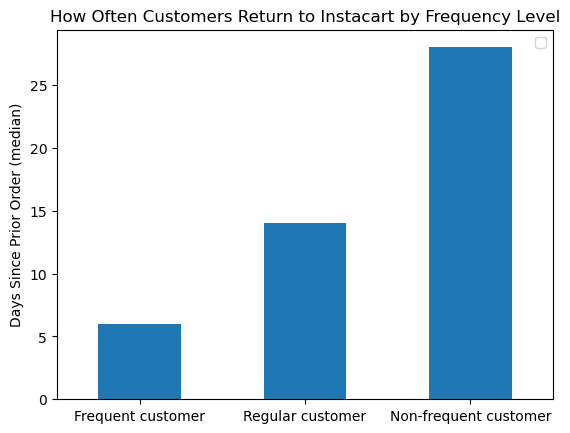

In [70]:
# Make a pivot table
piv6 = ords_prods_all.pivot_table(index='customer_frequency_level', values='days_since_prior_order', aggfunc='median')

# Create a bar chart of the pivot table
bar_cust_freq_level = piv6.sort_values(by='days_since_prior_order').plot.bar(title='How Often Customers Return to Instacart by Frequency Level', xlabel='', ylabel='Days Since Prior Order (median)', rot=0)
bar_cust_freq_level.legend('')

In [71]:
# Export bar_sales_price_range chart
bar_cust_freq_level.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_freq_level.png'))

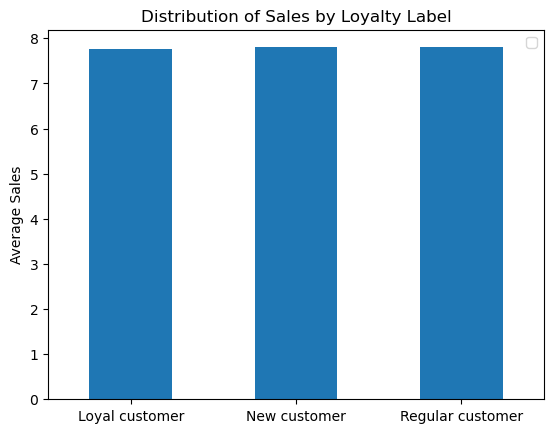

In [73]:
# Make a pivot table
piv7 = ords_prods_all.pivot_table(index='loyalty_label', values='prices', aggfunc='mean')

# Create a bar chart of the pivot table
bar_loyalty = piv7.plot.bar(title='Distribution of Sales by Loyalty Label', xlabel='', ylabel='Average Sales', rot=0)
bar_loyalty.legend('')

In [74]:
# Export bar_loyalty chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

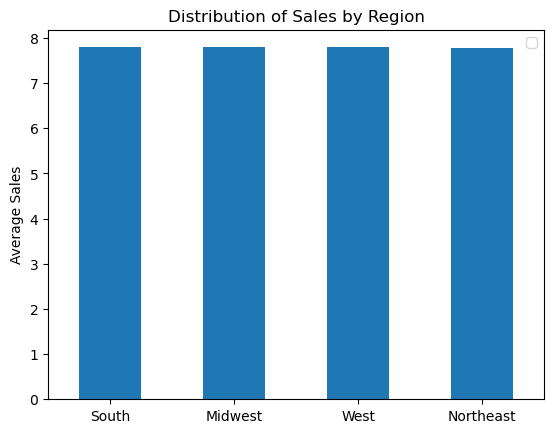

In [75]:
# Make a pivot table
piv8 = ords_prods_all.pivot_table(index='region', values='prices', aggfunc='mean')

# Create a bar chart of the pivot table
bar_region = piv8.sort_values(by='prices', ascending=False).plot.bar(title='Distribution of Sales by Region', xlabel='', ylabel='Average Sales', rot=0)
bar_region.legend('')

In [76]:
# Export bar_region chart
bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region.png'))

In [76]:
# Create a dictionary to rename the department_id
dept_map = {1: 'frozen',
            2: 'other',
            3: 'bakery',
            4: 'produce',
            5: 'alcochol',
            6: 'international',
            7: 'beverages',
            8: 'pets',
            9: 'dry goods pasta',
           10: 'bulk',
           11: 'personal care',
           12: 'meat seafood',
           13: 'pantry',
           14: 'breakfast',
           15: 'canned goods',
           16: 'dairy eggs',
           17: 'household',
           18: 'babies',
           19: 'snacks',
           20: 'deli',
           21: 'missing'}

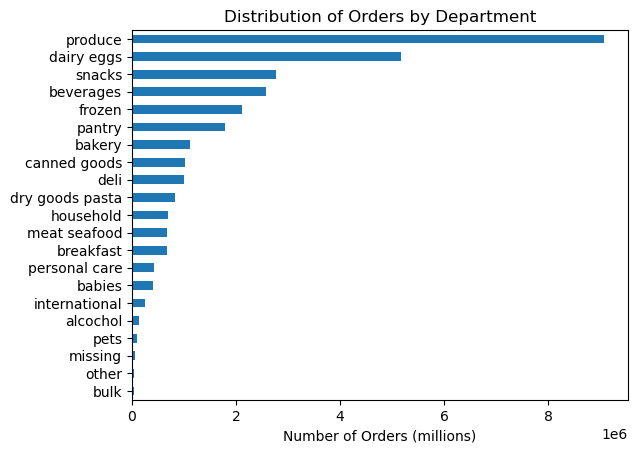

In [77]:
# Create a bar chart of the department_id
bar_dept = ords_prods_all['department_id'].value_counts(dropna = False, ascending=True).rename(dept_map).plot.barh(title = 'Distribution of Orders by Department', xlabel = 'Number of Orders (millions)')

In [78]:
# Export bar_dept chart
bar_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept.png'), bbox_inches='tight')